In [36]:
def BeamElementStiffness(E,I,L):
    """This function returns the element stiffness matrix for a beam element with modulus of elasticity E, 
    moment of inertia I, and length L. The size of the element stiffness matrix is 4 x 4."""

    y = E*I/(L*L*L) * np.array([[12, 6*L, -12, 6*L], [6*L, 4*L*L, -6*L, 2*L*L,],
                                [-12, -6*L, 12, -6*L], [6*L, 2*L*L, -6*L, 4*L*L,]])

    return y

In [37]:
def BeamAssemble(K,k,i,j):
    """"This function assembles the element stiffness matrix k of the beam element with nodes i and j 
    into the global stiffness matrix K. This function returns the global stiffness matrix K after the 
    element stiffness matrix k is assembled."""
    temp = [2*i-2, 2*i-1, 2*j-2, 2*j-1]
    for i in range(len(temp)):
        for j in range(len(temp)):
            K[temp[i], temp[j]] += k[i, j]
    
    return K


In [38]:
def BeamElementForces(k,u):
    """"This function returns the element nodal force vector given the element stiffness matrix k 
    and the element nodal displacement vector u.""" 
    return np.dot(k, u)

In [39]:
def BeamElementShearDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [f[0,0] , -f[2,0]]
    plt.plot(x,z)
    plt.ylabel('Shear Force (kN)')
    plt.show()

In [40]:
def BeamElementMomentDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [-f[1,0] , f[3,0]]
    plt.plot(x,z)
    plt.ylabel('Bending Moment (kN.m)')
    plt.show()

In [41]:
def SpringElementStiffness(k):
    """This function returns the element stiffness matrix for a spring with stiffness k.
    The size of the element stiffness matrix is 2 x 2."""
    
    y = np.array([[k, -k], [-k, k]])
    return y


In [42]:
def SpringAssemble(K,k,i,j):
    """This function assembles the element stiffness matrix k of the spring 
    with nodes i and j into the global stiffness matrix K. This function returns 
    the global stiffness matrix K after the element stiffness matrix k is assembled."""
    
    K[i,i] += k[0,0]
    K[i,j] += k[0,1]

    K[j,i] += k[1,0]
    K[j,j] += k[1,1]
    
    return K

In [43]:
def SpringElementForces(k,u):
    """This function returns the element nodal force vector given the element 
    stiffness matrix k and the element nodal displacement vector u."""
    
    y = np.dot(k, u)
    
    return y


In [44]:
##Step 1 : Initializing the problem

import numpy as np
import matplotlib.pyplot as plt
E = 70e6
I = 40e-6
L = 3
nodes = [1,2,3]
node_connections = [(1,2), (2,3)]
length = [L, L]

In [45]:
## Step 2 : Element Stiffness Matrices

k1 =  BeamElementStiffness(E,I,L)
k2 =  BeamElementStiffness(E,I,L)
k3 =  SpringElementStiffness(5000)

element_stiffness = [k1, k2, k3]

In [46]:
## Step 3 : Global Stiffness Matrix

K = np.zeros((2*len(nodes)+1, 2*len(nodes)+1))
K = BeamAssemble(K,k1,1,2)
K = BeamAssemble(K,k2,2,3)
K = SpringAssemble(K,k3,2,6)

K

array([[ 1244.44444444,  1866.66666667, -1244.44444444,  1866.66666667,
            0.        ,     0.        ,     0.        ],
       [ 1866.66666667,  3733.33333333, -1866.66666667,  1866.66666667,
            0.        ,     0.        ,     0.        ],
       [-1244.44444444, -1866.66666667,  7488.88888889,     0.        ,
        -1244.44444444,  1866.66666667, -5000.        ],
       [ 1866.66666667,  1866.66666667,     0.        ,  7466.66666667,
        -1866.66666667,  1866.66666667,     0.        ],
       [    0.        ,     0.        , -1244.44444444, -1866.66666667,
         1244.44444444, -1866.66666667,     0.        ],
       [    0.        ,     0.        ,  1866.66666667,  1866.66666667,
        -1866.66666667,  3733.33333333,     0.        ],
       [    0.        ,     0.        , -5000.        ,     0.        ,
            0.        ,     0.        ,  5000.        ]])

In [47]:
## Step 4 : Applying Boundary Conditions

U=np.zeros((len(nodes)*2+1,1))   
F=np.zeros((len(nodes)*2+1,1))   

U[0,0] = 0
U[1,0] = 0
U[4,0] = 0
U[6,0] = 0

F[2,0] = -10
F[3,0] = 0
F[5,0] = 0



In [48]:
## Step 5 : Solving the Equations

bound = [2,3,5]

Up=U[bound]
Fp=F[bound]
Kpp=K[bound]
Kpp=Kpp[:,bound]


Up=np.dot(np.linalg.inv(Kpp),Fp)
print("Deflection of Node 2 and Rotations of Node 2 and 3 are [U2 Phi2 Phi3]")
print(Up)

Deflection of Node 2 and Rotations of Node 2 and 3 are [U2 Phi2 Phi3]
[[-0.00155709]
 [-0.00022244]
 [ 0.00088977]]


In [49]:
## Post - processing

U[bound]=Up

force = []
for i in range(2*len(nodes)+1):
    if i not in bound:
        force.append(i)

F=np.dot(K,U)
print("Reactions at Node 1, 3, 4 are [F1y, M1, F3y, F4y]")
print(F[force,0])

Reactions at Node 1, 3, 4 are [F1y, M1, F3y, F4y]
[1.52249135 2.49134948 0.69204152 7.78546713]


In [50]:
## Shear Force and Bending Moment

u = [] 
f = []
for node in node_connections:
    u1 = np.asarray([U[node[0]*2-2],U[node[0]*2-1],U[node[1]*2-2],U[node[1]*2-1]])
    u.append(u1)

u.append([U[2],U[6]])

for i in range(len(node_connections)):
    f1 = BeamElementForces(element_stiffness[i], u[i])
    f.append(f1)
    print("The shear Force and Bending Moment in Element " + str(i+1) + " is" + '\n', f1)



The shear Force and Bending Moment in Element 1 is
 [[ 1.52249135]
 [ 2.49134948]
 [-1.52249135]
 [ 2.07612457]]
The shear Force and Bending Moment in Element 2 is
 [[-6.92041522e-01]
 [-2.07612457e+00]
 [ 6.92041522e-01]
 [-8.88178420e-16]]


In [51]:
f3 = SpringElementForces(element_stiffness[2], u[2])
print("The Spring Element Force is " + '\n', f3)

The Spring Element Force is 
 [[-7.78546713]
 [ 7.78546713]]


Shear Force Diagram for Element 1


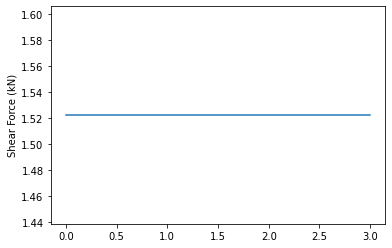

Bending Moment Diagram for Element 1


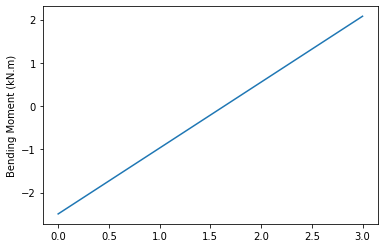

Shear Force Diagram for Element 2


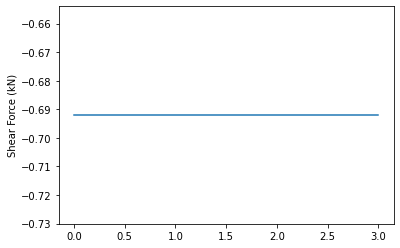

Bending Moment Diagram for Element 2


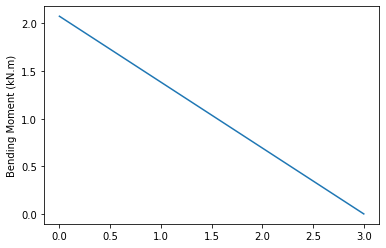

In [52]:
## SFD and BMD

for i in range(len(f)):
    print("Shear Force Diagram for Element "+ str(i+1))
    BeamElementShearDiagram(f[i],length[i])
    print("Bending Moment Diagram for Element "+ str(i+1))
    BeamElementMomentDiagram(f[i],length[i])
    
